# Train NN model on the FashionMNIST data

https://www.kaggle.com/zalando-research/fashionmnist

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

You may refer to this tutorial about the original Mnist:
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

Or any other tutorial you may find online:
https://www.kaggle.com/zalando-research/fashionmnist/code

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

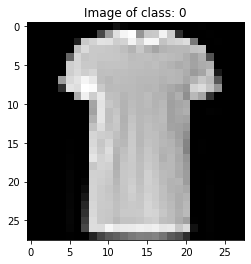

In [3]:
# Lest read a random image from the dataset and draw it
image, label = training_data[17]
plt.imshow(image[0], "gray")
plt.title(f"Image of class: {label}")
plt.show()

In [4]:
# Lets check image shape
image.shape

torch.Size([1, 28, 28])

In [5]:
# Lets see all the classes available
training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Task 1:

Create a DataLoader objects for train and test

In [6]:
train_loader = torch.utils.data.DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)

# Task 2:

Create a Neural Network

In [7]:
inp_size = 784
hidden_sizes = [256, 128, 64]
out_size = 10

model = nn.Sequential(nn.Linear(inp_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[2], out_size),
                     nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


# Task 3:

Specify loss and optimizer

In [8]:
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

epochs = 10

# Task 3:

Train model using for loop

In [9]:
def train_loop(dataloader, model, loss_f, optimizer):
    size = len(dataloader.dataset)
    n_batches, correct, train_loss = len(dataloader), 0, 0
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        X = X.view(X.size(0), -1)
        pred = model(X)
        loss = loss_f(pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        
    correct /= size
    train_loss /= n_batches
    print(f"Train Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f} \n")
        
def test_loop(dataloader, model, loss_f):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    y_preds = torch.tensor([])
    y_true = torch.tensor([])
    with torch.no_grad():
        for X, y in dataloader:
            X = X.view(X.size(0), -1)
            pred = model(X)
            
            test_loss += loss_f(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
            y_pred = torch.max(torch.exp(pred), 1)[1]
            y_preds = torch.cat((y_preds, y_pred), 0)
            y_true = torch.cat((y_true, y), 0)
        
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    
    return y_preds, y_true
    

# Task 4:

Report accuracy from train set, and test set independently

In [10]:
for e in range(epochs):
    print(f"Epoch {e+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    y_preds, y_true = test_loop(test_loader, model, criterion)

Epoch 1
-------------------------------
Train Error: 
 Accuracy: 52.2%, Avg loss: 1.340987 

Test Error: 
 Accuracy: 70.6%, Avg loss: 0.751704 

Epoch 2
-------------------------------
Train Error: 
 Accuracy: 77.7%, Avg loss: 0.626572 

Test Error: 
 Accuracy: 79.5%, Avg loss: 0.578203 

Epoch 3
-------------------------------
Train Error: 
 Accuracy: 81.4%, Avg loss: 0.529282 

Test Error: 
 Accuracy: 80.5%, Avg loss: 0.527759 

Epoch 4
-------------------------------
Train Error: 
 Accuracy: 83.1%, Avg loss: 0.480342 

Test Error: 
 Accuracy: 81.6%, Avg loss: 0.520545 

Epoch 5
-------------------------------
Train Error: 
 Accuracy: 84.2%, Avg loss: 0.448101 

Test Error: 
 Accuracy: 83.2%, Avg loss: 0.480504 

Epoch 6
-------------------------------
Train Error: 
 Accuracy: 85.0%, Avg loss: 0.423473 

Test Error: 
 Accuracy: 83.4%, Avg loss: 0.460881 

Epoch 7
-------------------------------
Train Error: 
 Accuracy: 85.7%, Avg loss: 0.403456 

Test Error: 
 Accuracy: 84.5%, Avg lo

# Task 5:

Report confussion matrix for the test set

Expected format:
```
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
```

In [11]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_true, y_preds)
print(f'Confusion matrix: \n {cf_matrix}')

Confusion matrix: 
 [[835   2   9  54   6   4  74   0  16   0]
 [  2 965   0  26   4   0   2   0   1   0]
 [ 17   7 703  19 165   1  80   0   8   0]
 [ 22  15   4 894  29   0  29   0   7   0]
 [  0   2  63  46 799   0  82   0   8   0]
 [  0   0   0   1   0 922   0  59   3  15]
 [158   2  90  51  76   0 594   0  29   0]
 [  0   0   0   0   0  16   0 974   0  10]
 [  4   1   1   6   3   5   7   8 965   0]
 [  0   0   0   0   0   6   0  72   1 921]]


# Task 6 (optional):

Train LogisticRegression and DecisionTree models on the same data
Compare their performance to the NN

In [12]:
from sklearn.tree import DecisionTreeClassifier

train_data = training_data.data.reshape(-1, 28*28).numpy()
train_target = training_data.targets.numpy()

testing_data = test_data.data.reshape(-1, 28*28).numpy()
test_target = test_data.targets.numpy()

class Logistic_Regression(torch.nn.Module):
    
    def __init__(self, features):
        super(Logistic_Regression, self).__init__()
        self.layer1 = torch.nn.Linear(features,256)
        self.layer2 = torch.nn.Linear(256,128)
        self.layer3 = torch.nn.Linear(128, 64)
        self.layer4 = torch.nn.Linear(64, 10)
        
    def forward(self,x):
        y_predicted = self.layer1(x)
        y_predicted = torch.sigmoid(self.layer2(y_predicted))
        y_predicted = torch.sigmoid(self.layer3(y_predicted))
        y_predicted = torch.sigmoid(self.layer4(y_predicted))
        return y_predicted
    
lr_model = Logistic_Regression(784)
for e in range(epochs):
    for batch, (X, y) in enumerate(train_loader):
        X, y = X.to(device), y.to(device)
        y_prediction_lr = lr_model.forward((X.view(X.size(0), -1)))
        loss_lr = criterion(y_prediction_lr, y)
        optimizer.zero_grad()
        loss_lr.backward()
        optimizer.step()
        
size_lr = len(test_loader.dataset)
correct_lr = 0
with torch.no_grad():
    for batch, (X, y) in enumerate(test_loader):
        X, y = X.to(device), y.to(device)
        y_prediction_lr_test = lr_model.forward((X.view(X.size(0), -1)))
        correct_lr += (y_prediction_lr_test.argmax(1) == y).type(torch.float).sum().item()
acc_lr = correct_lr/size_lr 

dtree_model = DecisionTreeClassifier()
prediction_dtree = dtree_model.fit(train_data, train_target).predict(testing_data)
acc_dtree = (prediction_dtree == test_target).sum()/len(test_target)

print("Logistic Regression accuracy: {acc_1}% \nDecision Tree accuracy: {acc_2}%".format(acc_1=acc_lr*100, acc_2=acc_dtree*100))


Logistic Regression accuracy: 9.92% 
Decision Tree accuracy: 78.82000000000001%
